In [ ]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso


In [ ]:
#loading the dataset and printing out shape
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")
train.head()

Train shape: (1460, 81)
Test shape: (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
#learning more about training dataset by printing out info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
 #learning more about testing dataset by printing out info
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

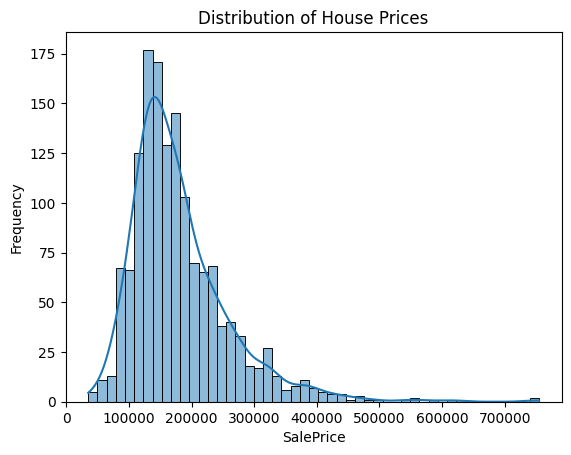

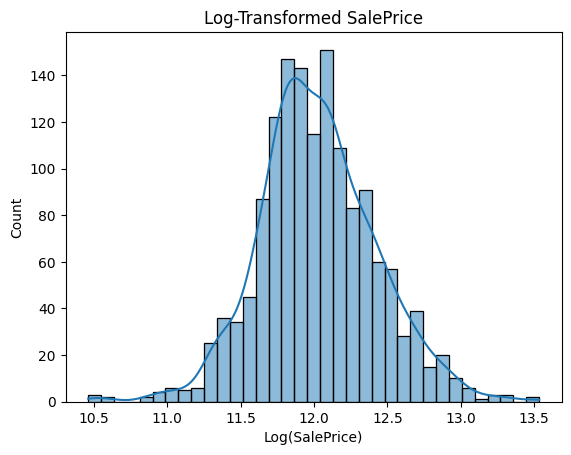

In [ ]:
#Sale price distrubution (shows how data is generally right skewed)
sns.histplot(train['SalePrice'], kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.show()

# Log-transformed version (shows balanced graph)
sns.histplot(np.log1p(train['SalePrice']), kde=True)
plt.title("Log-Transformed SalePrice")
plt.xlabel("Log(SalePrice)")
plt.show()


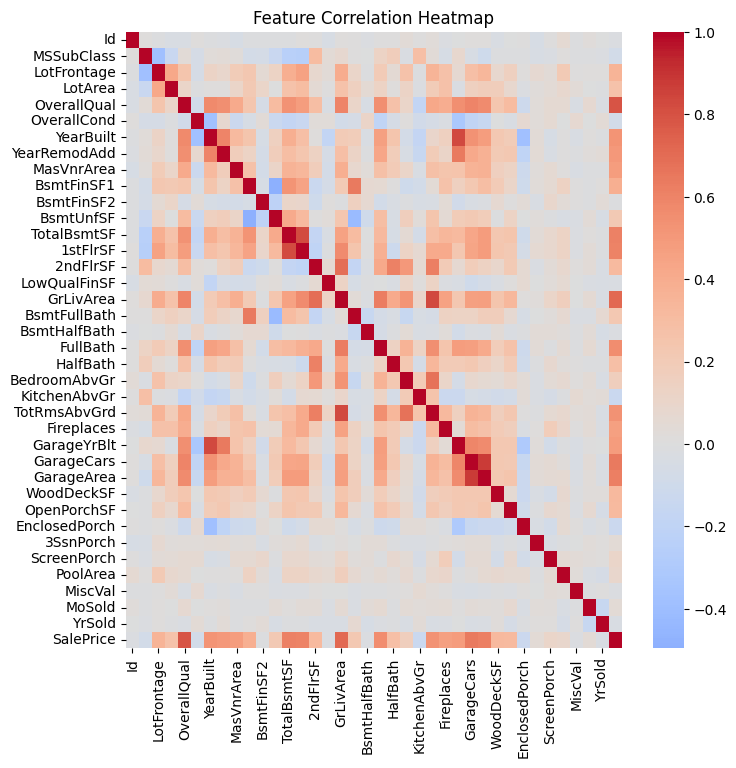

In [ ]:
#heatmap to show correlation between features
corr = train.corr(numeric_only=True)
plt.figure(figsize=(8,8))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
#Experiment 1 - Basic linear regression

#dropping unnecessary data columns
X = train.drop(["SalePrice", "Id"], axis=1)

#target value to predict sale price
y = np.log(train.SalePrice)

# Convert categorical columns into numerical values (dummy variables)
X = pd.get_dummies(X, drop_first=True)

# Handles missing values by filling with column means
imputer = SimpleImputer(strategy="mean")
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

#Train / Test split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

#prediction
y_predict = lr.predict(X_valid)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_valid, y_predict))
r2 = r2_score(y_valid, y_predict)

print(f"R² Score: {r2:}")
print(f"RMSE: {rmse:}")

R² Score: 0.748036373715708
RMSE: 0.21684053765707534


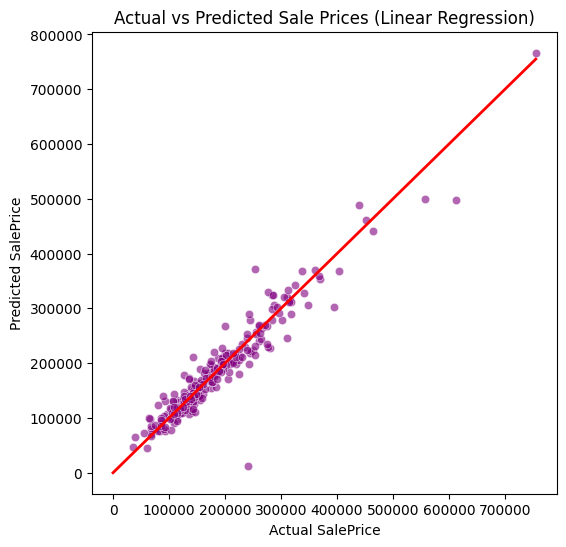

In [ ]:
# Convert back from log scale to actual SalePrice
y_valid_exp = np.exp(y_valid)
y_pred_exp = np.exp(y_predict)

#Actual vs Predicted Sales prices scatter plot
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_valid_exp, y=y_pred_exp, alpha=0.6, color='purple')
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted Sale Prices (Linear Regression)")
plt.plot([0, max(y_valid_exp)], [0, max(y_valid_exp)], color='red', lw=2)
plt.show()

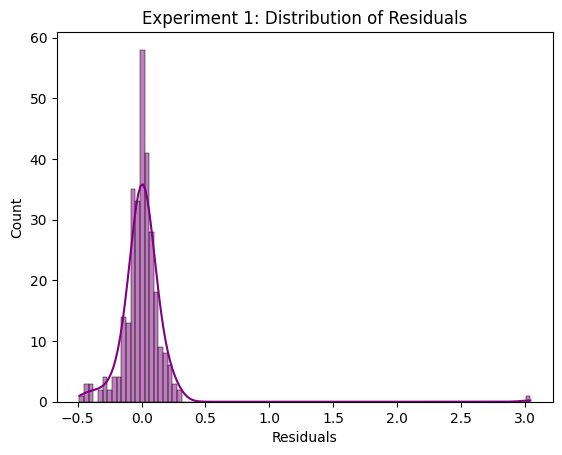

In [ ]:
#Residual plot to see if the data is evenly distributed
#Used Ai to help make this graph
residuals = y_valid - y_predict
sns.histplot(residuals, kde=True, color='purple')
plt.title("Experiment 1: Distribution of Residuals")
plt.xlabel("Residuals")
plt.show()

In [ ]:
#Experiment 2 - Linear regression with scaling and pipeline

#dropping unnecessary data columns
X = train.drop(["SalePrice", "Id"], axis=1)

#target value to predict SalePrice
y = np.log(train.SalePrice)

#fills numeric values with column mean
num_cols = X.select_dtypes(include=["number"]).columns
X[num_cols] = X[num_cols].fillna(X[num_cols].mean())

#fills categorical values with "none"
cat_cols = X.select_dtypes(exclude=["number"]).columns
X[cat_cols] = X[cat_cols].fillna("none")

#categorical to dummy variables ( so we can actually use linear regression)
X = pd.get_dummies(X, drop_first=True)

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Train / test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit
lr.fit(X_train, y_train)

# Predict and evaluate
y_pred = lr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"R² Score: {r2:}")
print(f"Experiment 2 RMSE: {rmse:}")



R² Score: 0.8382191655658502
Experiment 2 RMSE: 0.173754109876103


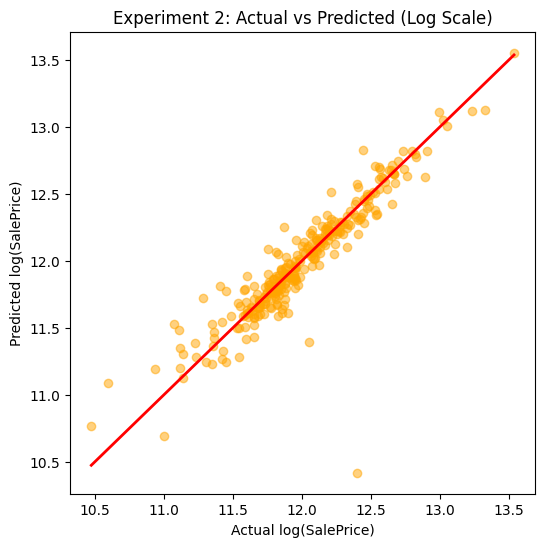

In [ ]:
#Actual vs Predicted Sales prices scatter plot for experiment 2

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='orange')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel("Actual log(SalePrice)")
plt.ylabel("Predicted log(SalePrice)")
plt.title("Experiment 2: Actual vs Predicted (Log Scale)")
plt.show()

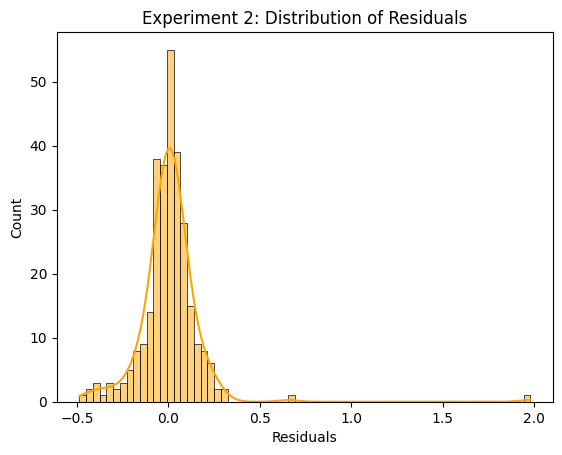

In [ ]:
#Residual plot to see if the data is evenly distributed

residuals = y_test - y_pred
sns.histplot(residuals, kde=True, color='orange')
plt.title("Experiment 2: Distribution of Residuals")
plt.xlabel("Residuals")
plt.show()


In [ ]:
#Experiment 3- Lasso and Ridge

#Defines preprocessor to apply scaling
preprocessor = Pipeline(steps=[('scaler', StandardScaler())])

# Train / test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge model
ridge_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=10))
])

# Lasso model
lasso_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=0.001, max_iter=10000))
])

# Fit
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

# Predict and evaluate
ridge_pred = ridge_model.predict(X_test)
lasso_pred = lasso_model.predict(X_test)

ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))

ridge_r2 = r2_score(y_test, ridge_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

print(f"Experiment 3 Ridge RMSE: {ridge_rmse:}")
print(f"Experiment 3 Ridge R² Score: {ridge_r2:}")
print(f"Experiment 3 Lasso RMSE: {lasso_rmse:}")
print(f"Experiment 3 Lasso R² Score: {lasso_r2:}")

Experiment 3 Ridge RMSE: 0.15582130053943788
Experiment 3 Ridge R² Score: 0.8698900383543049
Experiment 3 Lasso RMSE: 0.15902132226832277
Experiment 3 Lasso R² Score: 0.8644911624120724


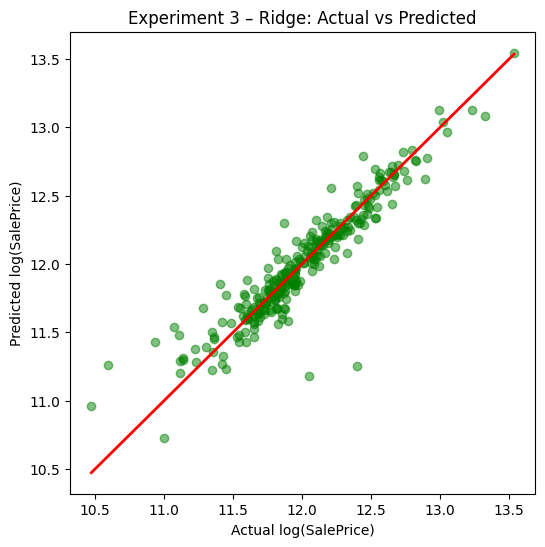

In [ ]:
#Actual vs Predicted Sales prices scatter plot for experiment 3 (ridge)

plt.figure(figsize=(6,6))
plt.scatter(y_test, ridge_pred, alpha=0.5, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel("Actual log(SalePrice)")
plt.ylabel("Predicted log(SalePrice)")
plt.title("Experiment 3 – Ridge: Actual vs Predicted")
plt.show()

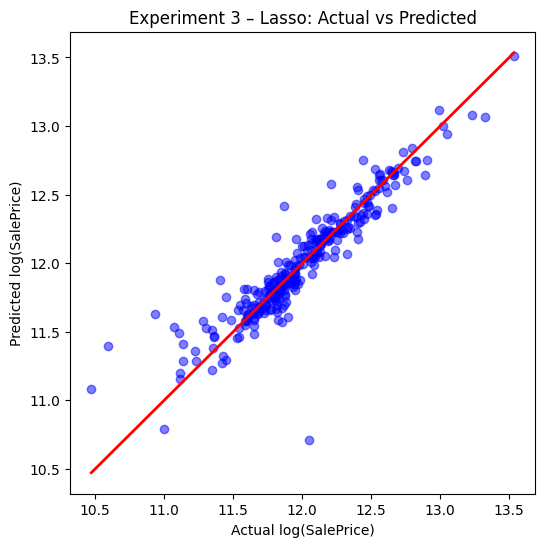

In [ ]:
#Actual vs Predicted Sales prices scatter plot for experiment 3 (lasso)

plt.figure(figsize=(6,6))
plt.scatter(y_test, lasso_pred, alpha=0.5, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel("Actual log(SalePrice)")
plt.ylabel("Predicted log(SalePrice)")
plt.title("Experiment 3 – Lasso: Actual vs Predicted")
plt.show()

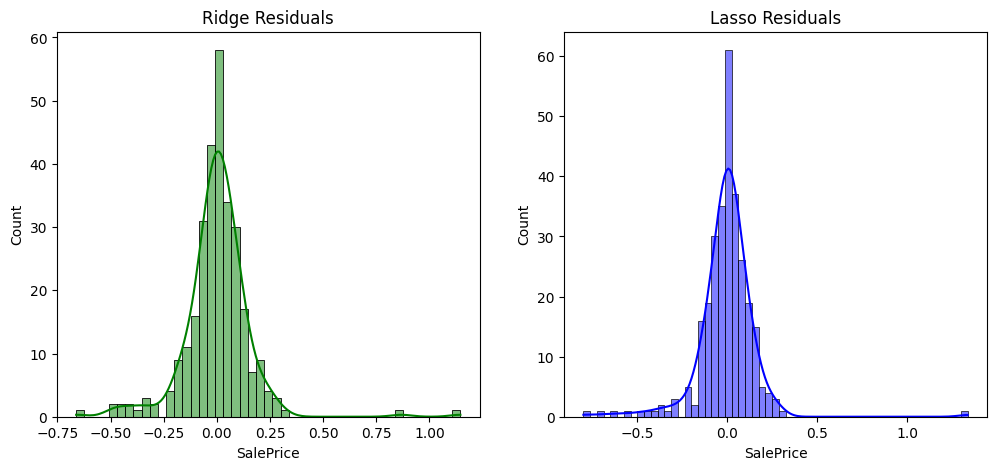

In [ ]:
#Residual plot to see if the data is evenly distributed

ridge_res = y_test - ridge_pred
lasso_res = y_test - lasso_pred

fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(ridge_res, kde=True, ax=axes[0], color='green')
axes[0].set_title("Ridge Residuals")
sns.histplot(lasso_res, kde=True, ax=axes[1], color='blue')
axes[1].set_title("Lasso Residuals")
plt.show()


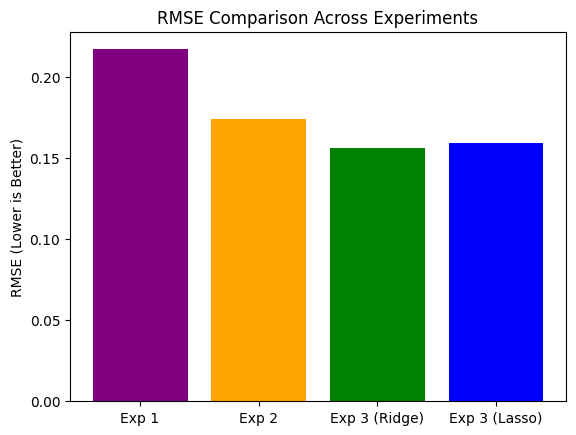

In [ ]:
#Comparison of all the models
experiments = ['Exp 1', 'Exp 2', 'Exp 3 (Ridge)', 'Exp 3 (Lasso)']
rmses = [0.2168, 0.1738, 0.1558, 0.1590]

plt.bar(experiments, rmses, color=['purple', 'orange', 'green', 'blue'])
plt.title("RMSE Comparison Across Experiments")
plt.ylabel("RMSE (Lower is Better)")
plt.show()
